Notebook usado para testar código solto.

In [1]:
from commpy.channels import awgn
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
import pyMRI.pymri as pymri
from pyMRI.utils import RMSE

In [2]:
the = np.arange(0.0, 2*np.pi, 0.1)
x = 1.0*np.cos(the)
y = 1.0*np.sin(the)


the_ = np.arctan2(y, x)

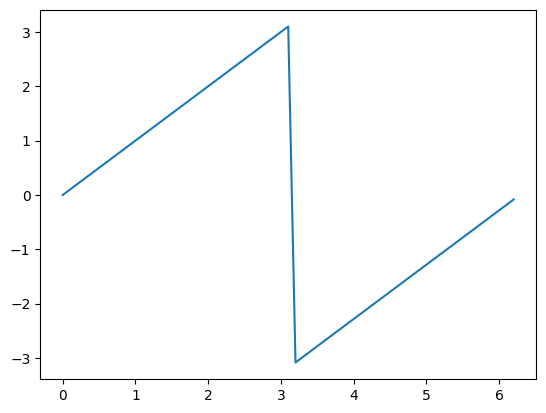

In [3]:
plt.plot(the, the_)

In [4]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws, t2s, M_0s

spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")


All frequencies are captured by the sampling rate.


In [5]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

sig_fft = sig_fft/np.nanmax(sig_fft)

c_sig_fft = awgn(sig_fft, 15)
c_sig  = np.fft.ifft(np.fft.ifftshift(c_sig_fft))

In [6]:
L = 0.4
noise_threshold = 1e-24

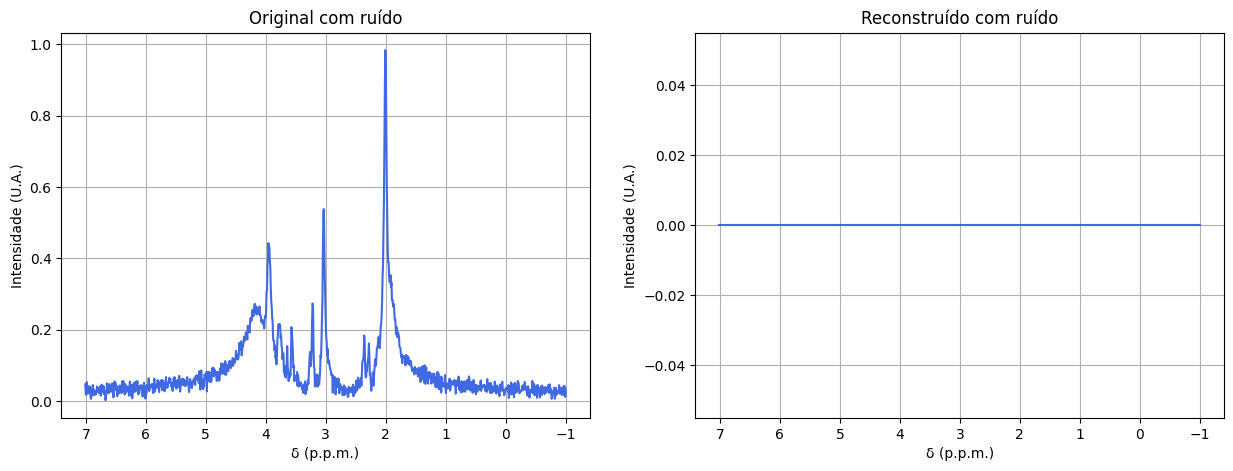

In [7]:
r_sig = pymri.filter_sig(c_sig, L, noise_threshold, rcond = 1e-24,  zero_filtering=1e-24)
freqs, r_sig_fft = pymri.fourier_spectrum(r_sig, dt, B0)

plt.figure(figsize=(15, 5))

plt.subplot(121)
pymri.plot_chem_shifts(freqs, c_sig_fft, 1.0, title = "Original com ruído", ylabel = "Intensidade (U.A.)", c = "royalblue")

plt.subplot(122)
pymri.plot_chem_shifts(freqs, r_sig_fft, 1.0, title = "Reconstruído com ruído", ylabel = "Intensidade (U.A.)", c = "royalblue")

In [8]:
import seaborn as sns

In [9]:
import colorsys
import matplotlib.colors as mcolors

def color_to_start(color_code, round_to=0.1):
    """Convert a color code to approximate cubehelix start value"""
    # Convert color to RGB (handling hex, named colors, etc.)
    rgb = mcolors.to_rgb(color_code)
    
    # Convert RGB to HSV (hue is 0-1)
    h, s, v = colorsys.rgb_to_hsv(*rgb)
    
    # Convert HSV hue to cubehelix start (0-3 range)
    # Cubehelix hue mapping differs from standard HSV
    # This is an approximation based on the color wheel:
    # Red=0, Green=1, Blue=2, back to Red=3
    if h < 1/6:    # Red-yellow
        start = 0 + h * 6 * 0.5
    elif h < 1/3:   # Yellow-green
        start = 0.5 + (h - 1/6) * 6 * 0.5
    elif h < 1/2:   # Green-cyan
        start = 1 + (h - 1/3) * 6 * 0.5
    elif h < 2/3:   # Cyan-blue
        start = 1.5 + (h - 1/2) * 6 * 0.5
    elif h < 5/6:   # Blue-magenta
        start = 2 + (h - 2/3) * 6 * 0.5
    else:           # Magenta-red
        start = 2.5 + (h - 5/6) * 6 * 0.5
    
    return round(start / round_to) * round_to if round_to else start

In [10]:
print(color_to_start("#4169E1"))

1.9000000000000001


[0.85882353 0.         0.45490196]


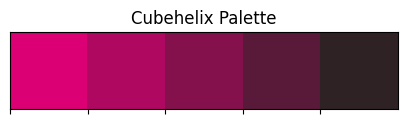

[[0.37010845703246104, 0.49369405559372476, 0.9058988320110072], [0.3755449411530324, 0.47838609637916946, 0.9018772868824401], [0.3811918494762432, 0.4631128660864731, 0.8970955818877517], [0.38701075391057094, 0.44789546765808963, 0.8915453319824498], [0.3929626699055033, 0.43275483242789553, 0.8852205901922198], [0.3990081739351402, 0.41771165677298916, 0.8781178669810648], [0.4051075222690676, 0.40278633937643665, 0.8702361428317826], [0.4112207707293211, 0.3879989192607979, 0.8615768740028915], [0.41730789512976585, 0.37336901475052864, 0.8521439914422352], [0.4233289120924119, 0.3589157635192579, 0.8419438928536667], [0.4292439999340485, 0.34465776387550184, 0.8309854279293947], [0.435013619316133, 0.3306130174375847, 0.8192798767767537], [0.440598633351104, 0.31679887334541706, 0.8068409215842679], [0.44596042685920156, 0.30323197415332465, 0.7936846115879179], [0.451061024471483, 0.2899282035443409, 0.7798293214144331], [0.4558632072769941, 0.2769026360022817, 0.765295702894184

In [11]:
custom_palette = sns.cubehelix_palette(
    n_colors=40,
    start=1.0,  # start hue (0-3)
    rot=-0.75,  # rotation around hue wheel
    gamma=1.0,  # gamma factor to emphasize darker/ligher colors
    hue=1.7,    # saturation
    light=0.5, # lightness of first color
    dark=0.2   # lightness of last color
)

custom_2 = sns.dark_palette("#DB0074", n_colors= 5, reverse = True)
print(np.asarray(custom_2)[0])

sns.palplot(custom_2)
plt.title("Cubehelix Palette")
plt.show()

print(custom_palette)

In [12]:
arr = np.array([1, 2, 4])
print(arr[arr.shape[0]//2 : ].shape)
print(arr.shape[0] - arr.shape[0]//2)

print(np.array([1, 2, 4]).shape)

(2,)
2
(3,)


In [13]:
arr = np.array([[1,4,6,2],
                [9,1,4,2]])

print(arr[:, arr.shape[1]//2:])
print(len(arr.shape))

[[6 2]
 [4 2]]
2


# Saving numpy arrays


In [14]:
a = np.array([[[1, 2], [3, 4], [5, 6]], [[4, 7], [9, 10], [1, 13]]])
name = "files/dummy/teste_array.npy"
d = np.save(name, a)
b = np.load(name)

print(a)
print(b[0])

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 4  7]
  [ 9 10]
  [ 1 13]]]
[[1 2]
 [3 4]
 [5 6]]


# Metabolite Graphs


In [86]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws, t2s, M_0s

spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

All frequencies are captured by the sampling rate.


In [88]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )

sig_fft = sig_fft/np.nanmax(sig_fft)

c_sig_fft = awgn(sig_fft, 10.0)
c_sig  = np.fft.ifft(np.fft.ifftshift(c_sig_fft))

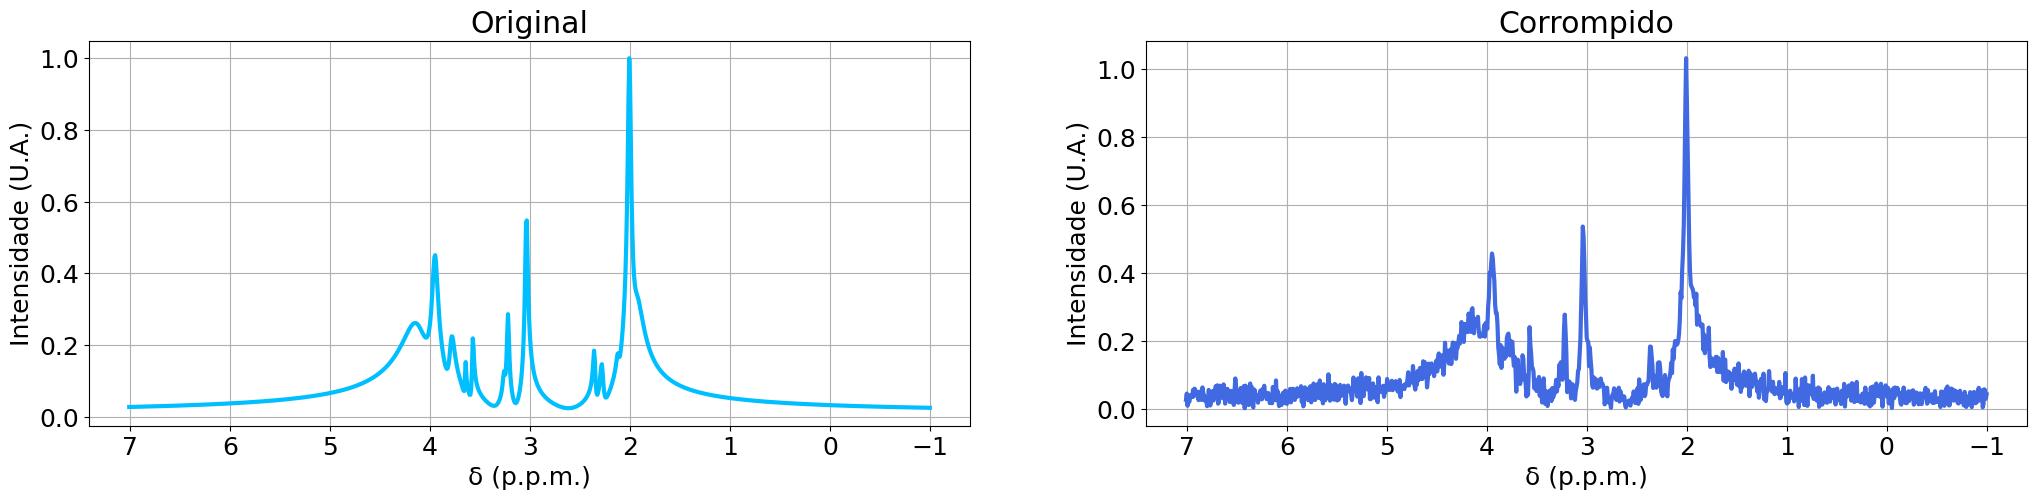

In [89]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(25, 5))

plt.subplot(121)
pymri.plot_chem_shifts(freqs, sig_fft, 1.0, title = "Original", ylabel = "Intensidade (U.A.)", c = "deepskyblue", linewidth=3.0)

plt.subplot(122)
pymri.plot_chem_shifts(freqs, c_sig_fft, 1.0, title = "Corrompido", ylabel = "Intensidade (U.A.)", c = "royalblue", linewidth=3.0)

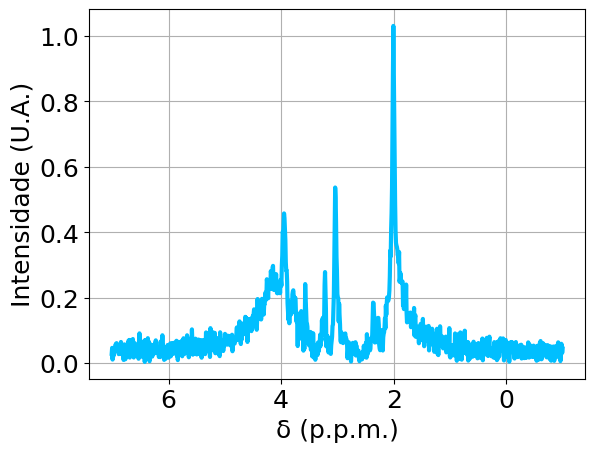

In [97]:
# plt.plot(t, c_sig.real, linewidth = 3.0, c = "deepskyblue")
pymri.plot_chem_shifts(freqs, c_sig_fft, title = "", ylabel = "Intensidade (U.A.)", c = "deepskyblue", linewidth=3.0)
# plt.xlim(0.0, 0.15)
# plt.ylim(-0.05, 0.05)
# plt.xticks([])
# plt.yticks([])
# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["left"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

In [83]:
metabolites = pymri.METABOLITES
met_i = 1

t0, tn, dt, B0 = pymri.setup_sim_t(0.0, 1.0, 2048, 3.0)

ws, t2s, M_0s = pymri.unpack_metabolites(metabolites, B0)
ws, t2s, M_0s = ws[met_i - 1:met_i + 1], t2s[met_i - 1:met_i + 1], M_0s[met_i - 1:met_i + 1]
ws[0] = ws[1] + 30.0
t2s[0] = t2s[1]
M_0s[0] = M_0s[1]
spins_phi = np.zeros_like(M_0s)

rcond = 1e-7 
zero_filtering = 1e-14

print( "All frequencies are captured by the sampling rate." if pymri.check_frequency(ws, dt) == True 
      else f"At least one frequency is NOT captured by the sampling rate")

All frequencies are captured by the sampling rate.


In [84]:
pop = pymri.population(ws, t2s, M_0s, spins_phi)

sig, t = pymri.population_transverse_decay( t0, tn, dt, pop, np.array([]) )
freqs, sig_fft = pymri.fourier_spectrum( sig, dt, B0 )
c_sig_fft = awgn(sig_fft, 5.0)
c_sig  = np.fft.ifft(np.fft.ifftshift(c_sig_fft))

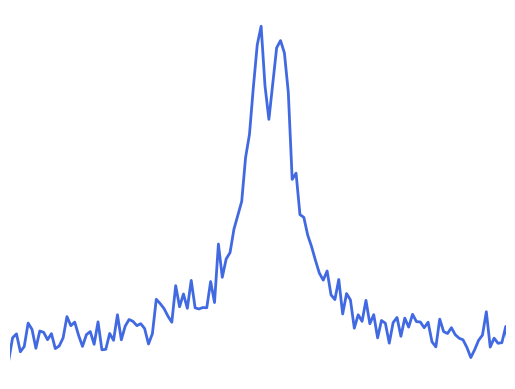

In [85]:
pymri.plot_chem_shifts(freqs, c_sig_fft, title = "", xlabel="", ylabel="", c = "royalblue", linewidth=2.0)
plt.xlim(1.5, 2.5)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)